In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!pip install pymatgen

In [4]:
from pymatgen import Composition

**Q1 - Exploratory data analysis (10 points)**

**1. How many elements are there in this data set?**

  ANS: There are 124515 elements

**2. What is the maximum number of elements (max_el) in a single structure?**

  ANS: The maximum number is 9.

**3. Plot a barplot of the number of materials having 1, 2, 3, ... max_els. Use a log scale for the y-axis.**

ANS: Shown below

**4. Count the number of materials where each element is present. Sort this count and answer the following questions. What are the 10 most common elements in this data set? and what are the 10 least common elements in this data set?**

ANS: 

10 Most common:
'O','Li','P','Mn','S','Fe','N','F','Si','Mg'

10 Most uncommon:
'Ne','Ar','He','Kr','Xe','Pa','Ac','Np','Pu','Pm'

In [5]:
url = 'https://raw.githubusercontent.com/materialsvirtuallab/nano281/master/labs/lab2/data.csv'
orig_data = pd.read_csv(url,na_filter=False,engine='python')
orig_data.shape

(124515, 6)

In [6]:
formulas = orig_data.loc[:,'formula']
comp = np.zeros(orig_data.shape[0])
for i in range(0,orig_data.shape[0]):
  comp[i] = len(Composition(str(formulas[i])))
np.amax(comp)

9.0

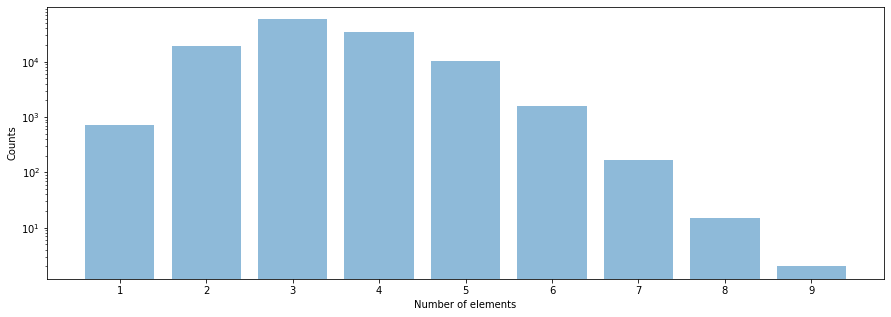

In [7]:
uniqueNum,counts = np.unique(comp, return_counts=True)
objects = ('1','2','3','4','5','6','7','8','9') 
plt.figure(figsize = (15, 5)) 
plt.bar(objects, counts,align='center', alpha=0.5)
plt.yscale('log')
plt.xlabel('Number of elements')
plt.ylabel('Counts')
plt.show()

In [8]:
element = [] #declear an empty list
for i in range(0,orig_data.shape[0]):
  comp_e = Composition(str(formulas[i]))
  element.append(comp_e.to_data_dict['unit_cell_composition'])

/usr/local/lib/python3.6/dist-packages/pymatgen/core/periodic_table.py:441: UserWarning:

No electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.

/usr/local/lib/python3.6/dist-packages/pymatgen/core/periodic_table.py:441: UserWarning:

No electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.

/usr/local/lib/python3.6/dist-packages/pymatgen/core/periodic_table.py:441: UserWarning:

No electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.



In [9]:
from collections import defaultdict
d = defaultdict(list)
for i in range(orig_data.shape[0]):
  for k,v in element[i].items():
    d[k].append(v)

In [ ]:
res = sorted(d, key = lambda key: len(d[key]))

In [ ]:
list(res)

In [10]:
orig_data.head()

,task_id,formula,formation_energy_per_atom,e_above_hull,band_gap,has_bandstructure
0,mp-1007923,CrNi3,-0.016354,0.000802,0.0,False
1,mp-1008754,TbHg2,-0.069428,0.329909,0.0,True
2,mp-1016886,MgVO3,-2.241438,0.545977,0.0,True
3,mp-1018902,PrSbPt,-1.111238,0.000000,0.0,True
4,mp-1020595,Rb8PO3,-0.772860,0.491666,0.0,True


In [11]:
orig_data.shape

(124515, 6)

**Q2 - Data cleaning and feature computations**

**1. Filter out materials that contain noble gas elements and save it in variable data. How many materials are left? Store this number in the variable n.**

ANS: 124343 materials were left

**2. Load the element property data file element_properties.csv in variable element_data using pandas by setting index_col=0 in pandas.read_csv function. How many NaN (Not a Number) are there in each column?**
AtomicRadius               7
AtomicVolume               2
AtomicWeight               0
BulkModulus               26
BoilingT                   2
Column                     0
CovalentRadius             0
Density                    2
ElectronAffinity           9
Electronegativity          4
FirstIonizationEnergy      1
HeatCapacityMass          10
Row                        0
phi                       22
SecondIonizationEnergy    12
ShearModulus              34

**3.Compute the mean values for each column, ignoring the NaNs. For each column, fill the NaN with the mean value of that column. This is a common data imputation technique.**



In [12]:
data_copy = orig_data
for i in range(0,orig_data.shape[0]):
  elem = Composition(str(formulas[i]))
  for j in range(len(elem.elements)):
    if 'Ar' == elem.elements[j].name:
      data_copy = data_copy.drop(i)
      break
    elif 'He' == elem.elements[j].name:
      data_copy = data_copy.drop(i)
      break
    elif 'Kr' == elem.elements[j].name:
      data_copy = data_copy.drop(i)
      break
    elif 'Xe' == elem.elements[j].name:
      data_copy = data_copy.drop(i)
      break
    elif 'Rn' == elem.elements[j].name:
      data_copy = data_copy.drop(i)
      break
    elif 'Og' == elem.elements[j].name:
      data_copy = data_copy.drop(i)
      break
n = data_copy.shape[0]
data = data_copy

In [ ]:
print(n)

124343


In [18]:
data_copy = data_copy.reset_index(drop=True)
data_copy

,task_id,formula,formation_energy_per_atom,e_above_hull,band_gap,has_bandstructure
0,mp-1007923,CrNi3,-0.016354,0.000802,0.0000,False
1,mp-1008754,TbHg2,-0.069428,0.329909,0.0000,True
2,mp-1016886,MgVO3,-2.241438,0.545977,0.0000,True
3,mp-1018902,PrSbPt,-1.111238,0.000000,0.0000,True
4,mp-1020595,Rb8PO3,-0.772860,0.491666,0.0000,True
...,...,...,...,...,...,...
124338,mvc-9995,Zn(MoO2)2,-1.774105,0.170001,0.6809,True
124339,mvc-9996,MgV2O4,-2.669536,0.053871,1.4898,True
124340,mvc-9997,Ca(CoO2)2,-1.777514,0.161485,0.0000,True
124341,mvc-9998,CaLaCrWO6,-2.890804,0.061516,2.1305,True


In [15]:
data_copy.shape

(124343, 6)

**2. Load the element property data file element_properties.csv in variable element_data using pandas by setting index_col=0 in pandas.read_csv function. How many NaN (Not a Number) are there in each column?**

In [ ]:
url = 'https://raw.githubusercontent.com/materialsvirtuallab/nano281/master/labs/lab2/element_properties.csv'
element_data = pd.read_csv(url,index_col=0,engine='python')
element_data.shape

(95, 16)

In [ ]:
count_nan_in_df = element_data.isnull().sum()
print (count_nan_in_df)

AtomicRadius               7
AtomicVolume               2
AtomicWeight               0
BulkModulus               26
BoilingT                   2
Column                     0
CovalentRadius             0
Density                    2
ElectronAffinity           9
Electronegativity          4
FirstIonizationEnergy      1
HeatCapacityMass          10
Row                        0
phi                       22
SecondIonizationEnergy    12
ShearModulus              34
dtype: int64


**3. Compute the mean values for each column, ignoring the NaNs. For each column, fill the NaN with the mean value of that column. This is a common data imputation technique.**

In [ ]:
colum_mean = element_data.mean(axis=0,skipna=True)

In [ ]:
colum_mean

AtomicRadius                 1.500682
AtomicVolume              3426.442121
AtomicWeight               116.153896
BulkModulus                 90.794203
BoilingT                  2549.858065
Column                       8.315789
CovalentRadius             151.810526
Density                   7489.235725
ElectronAffinity            76.162209
Electronegativity            1.747033
FirstIonizationEnergy        8.094711
HeatCapacityMass             0.635447
Row                          4.831579
phi                          4.034247
SecondIonizationEnergy      18.947504
ShearModulus                47.362295
dtype: float64

In [ ]:
element_data_updated = element_data.fillna(element_data.mean())

**4. Compute the composition-averaged AtomicRadius for all materials and store the results in variable atomic_radius. For example, averaged AtomicRadius for Li2O can be computed as (2 * 1.45 + 0.6) / 3, where 1.45 is the AtomicRadius for Li and 0.6 is the AtomicRadius for O.**

In [ ]:
atomic_radius = np.zeros(orig_data.shape[0])
for i in range(0,orig_data.shape[0]):
  elem = Composition(str(formulas[i]))
  num = np.zeros(len(elem.elements))
  r   = np.zeros(len(elem.elements))
  for j in range(len(elem.elements)):
    num[j] = elem.to_data_dict['unit_cell_composition'][elem.elements[j].name]
    r[j]   = element_data_updated.loc[elem.elements[j].name,'AtomicRadius']   
  temp = np.multiply(num,r)
  temp = temp.sum()
  atomic_radius[i] = temp/num.sum()

/usr/local/lib/python3.6/dist-packages/pymatgen/core/periodic_table.py:441: UserWarning:

No electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.

/usr/local/lib/python3.6/dist-packages/pymatgen/core/periodic_table.py:441: UserWarning:

No electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.

/usr/local/lib/python3.6/dist-packages/pymatgen/core/periodic_table.py:441: UserWarning:

No electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.



In [25]:
atomic_radius

NameError: ignored

**5. Compute the composition-averaged properties for all properties in element_data and for all materials. Store the results in the variable average_properties. average_properties should have a dimension of (n, 16) where n is the number of materials and 16 is the number of properties.**

In [ ]:
n = orig_data.shape[0]
average_properties = np.zeros((n,16))
list_of_property = ['AtomicRadius','AtomicVolume','AtomicWeight','BulkModulus','BoilingT',
                    'Column','CovalentRadius','Density','ElectronAffinity','Electronegativity',
                    'FirstIonizationEnergy','HeatCapacityMass','Row','phi','SecondIonizationEnergy',
                    'ShearModulus']
for idx_x in range(n):
  elem = Composition(str(formulas[idx_x]))
  num  = np.zeros(len(elem.elements))
  r    = num
  for idx_y in range(16):   
      for j in range(len(r)):
        num[j] = elem.to_data_dict['unit_cell_composition'][elem.elements[j].name]
        r[j]   = element_data_updated.loc[elem.elements[j].name,list_of_property[idx_y]]   
      temp = np.multiply(num,r)
      temp = temp.sum()
      average_properties[idx_x,idx_y] = temp/num.sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/pymatgen/core/periodic_table.py:441: UserWarning:

No electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.

/usr/local/lib/python3.6/dist-packages/pymatgen/core/periodic_table.py:441: UserWarning:

No electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.

/usr/local/lib/python3.6/dist-packages/pymatgen/core/periodic_table.py:441: UserWarning:

No electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.



In [ ]:
average_properties

array([[1.37545455e+00, 1.15459008e+01, 5.55473610e+01, ...,
        4.94035533e+00, 1.73681443e+01, 9.94816754e+01],
       [1.63461538e+00, 2.88561661e+01, 1.82171957e+02, ...,
        3.77113360e+00, 1.60032747e+01, 3.93180040e+01],
       [1.28478261e+00, 1.85552430e+04, 3.77195057e+01, ...,
        3.94061478e+00, 2.58317747e+01, 4.25744368e+01],
       ...,
       [1.44600000e+00, 1.85385255e+04, 4.63900596e+01, ...,
        4.17550632e+00, 2.60046060e+01, 6.10573895e+01],
       [1.57535211e+00, 1.84846014e+04, 1.33832771e+02, ...,
        4.03499534e+00, 2.23717417e+01, 1.20778715e+02],
       [1.59236111e+00, 1.84736536e+04, 1.03783866e+02, ...,
        3.86281087e+00, 2.22341223e+01, 7.95140985e+01]])

**6. Similar to the previous computations of average properties, compute the maximum properties and minimum properties for all properties and all materials, and store them in variables max_properties and min_properties respectively. Both variables should have dimension (n, 16).**

In [ ]:
n = orig_data.shape[0]
max_properties = np.zeros((n,16))
min_properties = np.zeros((n,16))
list_of_property = ['AtomicRadius','AtomicVolume','AtomicWeight','BulkModulus','BoilingT',
                    'Column','CovalentRadius','Density','ElectronAffinity','Electronegativity',
                    'FirstIonizationEnergy','HeatCapacityMass','Row','phi','SecondIonizationEnergy',
                    'ShearModulus']
for idx_x in range(n):
  elem = Composition(str(formulas[idx_x]))
  r    = np.zeros(len(elem.elements))
  for idx_y in range(16):   
      for j in range(len(r)):
        r[j]   = element_data_updated.loc[elem.elements[j].name,list_of_property[idx_y]]   
      max_properties[idx_x,idx_y] = np.amax(r)
      min_properties[idx_x,idx_y] = np.amin(r)

**7.Concatenate average_properties, max_properties and min_properties, and store the result in variable design_matrix with dimension (n, 48).**

In [ ]:
 design_matrix = np.concatenate((average_properties,max_properties,min_properties))

**Q3 - Regression and classification modeling (40 points)**

**1. Split the data (design_matrix as X, and targets as y) into training and test sets in the ratio 90%:10%. Store the training data in variables train_X and train_y and the test data as variables test_X and test_y. To make sure the data is reproducible, set the random_state=42 in sklearn.model_selection.train_test_split.**